# Importe de librerias

In [590]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import NearMiss
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
scaler = MinMaxScaler()

# Carga de datos

In [591]:
df = pd.read_csv("../data/credit_card_transactions.csv")
df.head()

,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0


# EDA

In [592]:
df.head()

,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0


In [593]:
df.dtypes

TransactionID         int64
Time                 object
Amount              float64
CardholderName       object
MerchantName         object
MCC                   int64
Location             object
Device               object
IPAddress            object
TransactionSpeed    float64
Fraud                 int64
dtype: object

## Transformacion de datos

In [594]:
df['Time'] = pd.to_datetime(df['Time'], errors = 'coerce')
df['MCC'] = df['MCC'].astype(object)
df['Weekday'] = df['Time'].dt.weekday
df['Hour'] = df['Time'].dt.hour
df['Month'] = df['Time'].dt.month

In [595]:
df.head()

,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud,Weekday,Hour,Month
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0,6,6,3
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0,4,5,2
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0,4,15,5
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0,4,9,5
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0,3,17,4


In [596]:
df.describe()

,TransactionID,Time,Amount,TransactionSpeed,Fraud,Weekday,Hour,Month
count,10000.00000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2024-10-30 03:27:20.494300160,547.347491,30.738446,0.019200,2.995400,11.525500,6.528300
min,1.00000,2024-05-01 07:29:17,10.090000,0.110000,0.000000,0.000000,0.000000,1.000000
25%,2500.75000,2024-07-31 11:55:39.500000,263.222500,14.910000,0.000000,1.000000,6.000000,4.000000
50%,5000.50000,2024-10-30 22:49:50,512.240000,29.655000,0.000000,3.000000,12.000000,7.000000
75%,7500.25000,2025-01-28 03:57:06.750000128,759.935000,45.270000,0.000000,5.000000,17.000000,10.000000
max,10000.00000,2025-05-01 09:39:46,4988.070000,119.860000,1.000000,6.000000,23.000000,12.000000
std,2886.89568,NaN,460.047329,19.092345,0.137234,1.991626,6.932341,3.467795


In [597]:
df = df.drop(['CardholderName','TransactionID', 'Time', 'IPAddress'], axis=1)
df.isna().sum()

Amount              0
MerchantName        0
MCC                 0
Location            0
Device              0
TransactionSpeed    0
Fraud               0
Weekday             0
Hour                0
Month               0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x73c04d1c0cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x73c04d1c0f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x73c04d1c0b90>],
 'medians': [<matplotlib.lines.Line2D at 0x73c04d1c11d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x73c04d1c1310>],
 'means': []}

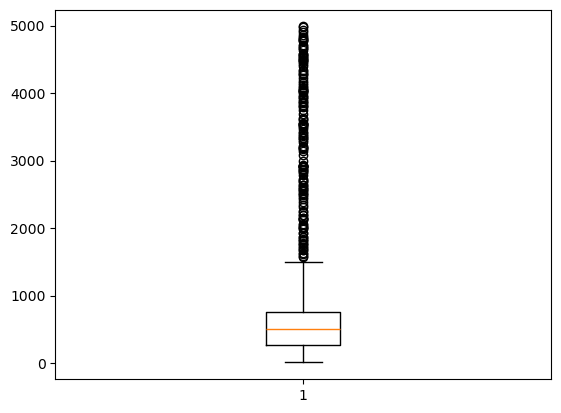

In [598]:
plt.boxplot(df['Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x73c04d1efd90>,
 'caps': [<matplotlib.lines.Line2D at 0x73c04d040050>,
 'boxes': [<matplotlib.lines.Line2D at 0x73c04d1efc50>],
 'medians': [<matplotlib.lines.Line2D at 0x73c04d0402d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x73c04d040410>],
 'means': []}

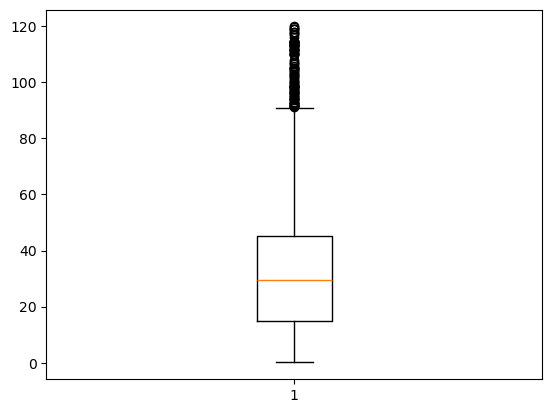

In [599]:
plt.boxplot(df['TransactionSpeed'])

In [600]:
# IQR Amount
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3 - q1

limite_superior = q3 + 1.5 * iqr

df['is_large_amount'] = (df['Amount'] > limite_superior).astype(int)


# IQR TransactionSpeed
q1 = df['TransactionSpeed'].quantile(0.25)
q3 = df['TransactionSpeed'].quantile(0.75)
iqr = q3 - q1

limite_superior = q3 + 1.5 * iqr

df['is_slow_transaction'] = (df['TransactionSpeed'] > limite_superior).astype(int)


In [601]:
#Data desbalanceada
fraudes = (df['Fraud'] == 0).sum()
noFraudes = (df['Fraud'] == 1).sum()

print('Proporciones')
print(f'Fraudes: {noFraudes/ (fraudes+noFraudes)}')
print(f'No fraudes: {fraudes/ (fraudes+noFraudes)}')

Proporciones
Fraudes: 0.0192
No fraudes: 0.9808


# SPLIT

In [602]:
X = df.drop('Fraud', axis=1)
y = df['Fraud']

In [603]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Normalizacion de datos

In [604]:
#Inicializacion de normalizador
numericFeatures = ['Amount', 'TransactionSpeed', 'is_large_amount', 'is_slow_transaction']
categoricFeatures = ['MerchantName','Location', 'MCC', 'Device']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numericFeatures),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categoricFeatures)
    ]
)

In [605]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [606]:
nm = NearMiss(version=3, n_neighbors=3)
X_train_balanced, y_train_balanced = nm.fit_resample(X_train_processed, y_train)
print(pd.Series(y_train_balanced).value_counts())

Fraud
1    154
0    139
Name: count, dtype: int64


/home/mathias/.conda/envs/MachineLearning/lib/python3.13/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:206: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


# GaussianNB

In [607]:
model = GaussianNB()
model.fit(X_train_balanced, y_train_balanced)

GaussianNB()

In [608]:
y_pred_nb = model.predict(X_test_processed)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1962
           1       0.44      0.82      0.57        38

    accuracy                           0.98      2000
   macro avg       0.72      0.90      0.78      2000
weighted avg       0.99      0.98      0.98      2000



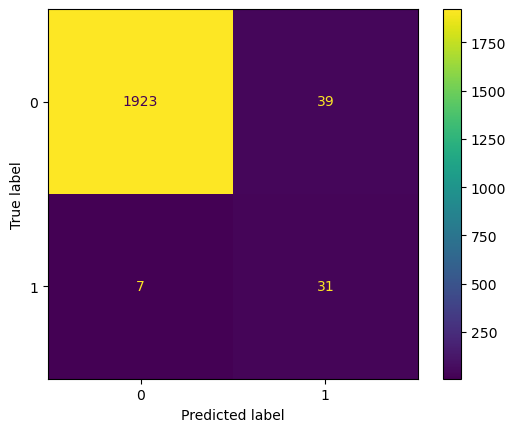

In [609]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb), display_labels=model.classes_).plot()

# MLP

In [610]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, verbose=True, random_state=42)
mlp.fit(X_train_balanced, y_train_balanced)

Iteration 1, loss = 0.72348572
Iteration 2, loss = 0.70725986
Iteration 3, loss = 0.69258293
Iteration 4, loss = 0.67942687
Iteration 5, loss = 0.66583116
Iteration 6, loss = 0.65062152
Iteration 7, loss = 0.63471900
Iteration 8, loss = 0.61781519
Iteration 9, loss = 0.60066507
Iteration 10, loss = 0.58189262
Iteration 11, loss = 0.56188440
Iteration 12, loss = 0.54042909
Iteration 13, loss = 0.51662309
Iteration 14, loss = 0.49099518
Iteration 15, loss = 0.46355668
Iteration 16, loss = 0.43481225
Iteration 17, loss = 0.40507067
Iteration 18, loss = 0.37438269
Iteration 19, loss = 0.34387632
Iteration 20, loss = 0.31430518
Iteration 21, loss = 0.28563461
Iteration 22, loss = 0.25829011
Iteration 23, loss = 0.23241903
Iteration 24, loss = 0.20813840
Iteration 25, loss = 0.18557465
Iteration 26, loss = 0.16488139
Iteration 27, loss = 0.14617440
Iteration 28, loss = 0.12924395
Iteration 29, loss = 0.11417411
Iteration 30, loss = 0.10077336
Iteration 31, loss = 0.08910269
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42,
              verbose=True)

In [611]:
y_pred_mlp = mlp.predict(X_test_processed)
print(classification_report(y_test, y_pred_mlp))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1962
           1       0.74      0.84      0.79        38

    accuracy                           0.99      2000
   macro avg       0.87      0.92      0.89      2000
weighted avg       0.99      0.99      0.99      2000



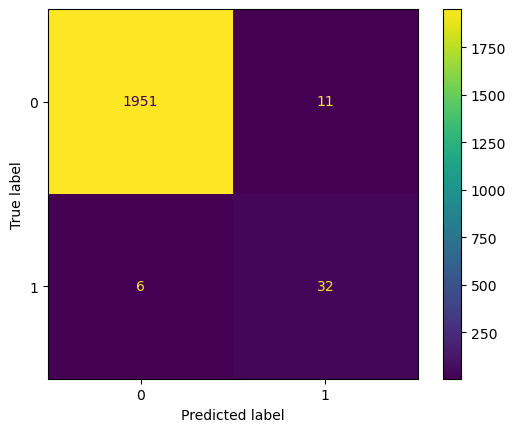

In [612]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_mlp), display_labels=mlp.classes_).plot()

# ROC

In [613]:
y_pred_proba_mlp = mlp.predict_proba(X_test_processed)[:, 1]
y_pred_proba_gnb = model.predict_proba(X_test_processed)[:, 1]

In [614]:
# Para MLP
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Para GaussianNB
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_pred_proba_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

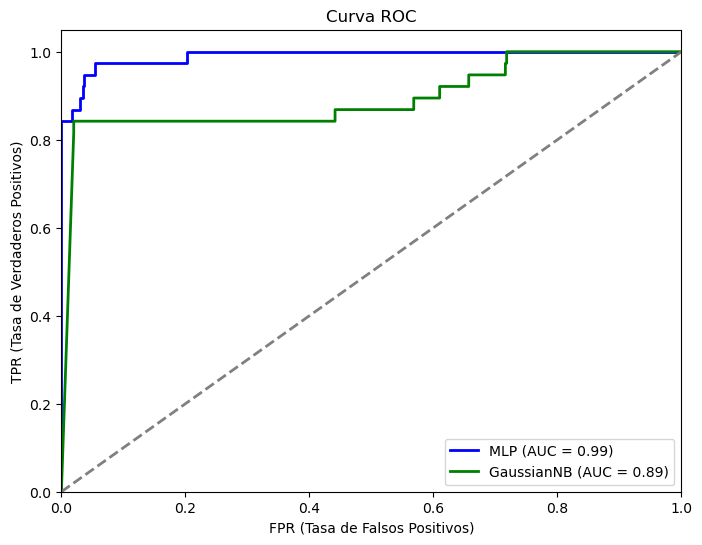

In [615]:
# Graficar
plt.figure(figsize=(8, 6))

# Curva ROC para MLP
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label=f'MLP (AUC = {roc_auc_mlp:.2f})')

# Curva ROC para GaussianNB
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label=f'GaussianNB (AUC = {roc_auc_gnb:.2f})')

# Curva ROC ideal (diagonal)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR (Tasa de Falsos Positivos)')
plt.ylabel('TPR (Tasa de Verdaderos Positivos)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
